# Final notebook: part 2

* [Value iteration method for Gridworld MDP](#val_iter)
* [Optimisation: brief introduction](#opt)
* [Linear programming for Gridworld MDP](#lin-grid)
* [Linear programming code](#lin-code)
* [Linear programming application examples](#lin-ex)

    

## Value iteration method for Gridworld MDP <a class="anchor" id="val_iter"></a>

### Gridworld formalisation
* $s \in S$: a position in the grid
* $a \in A$: a movement in the grid 
* $r \in R$: a reward ($r \in \R$)
* $p(s' r | s a)$: a transiction function, in our case is deterministic, namely given a state $s$ and an action $a$ we automatically know the next state $s'$ and the reward $r$ we get.
* $\pi (a|s): S \rightarrow A $ s.t. $s \rightarrow \bar{p}(A)$ where $\bar{p}$ represents a distribution on $A$. In our case we have $\bar{p}(a^*) = 1$ and $\bar{p}(a_i) = 0$ for all $a_i \neq a^*$.

### Value iteration
The idea of the value iteration procedure is the following:

<img src="./Images/VI_11.png" alt="Image Alt Text" width="700" height="300" />

Given the Bellman operator $B$, the procedure is
$$
V_{k+1} = B [V_k].
$$
The algorithm is

1. Initialize $V_0$ as a vector in $\R^{|S|}$.

2. Loop:  $V_{k+1} = B[V_k]$.

3. Stop when $||V_{k+1} - V_k||$ is less than the specified tolerance.

4. Return $a^*(s) = \argmax_a [r(sa) + \gamma * \sum_{s'} p(s'|s,a) V_k (s')]$, for all $s \in S$


## Optimisation: brief introduction <a class="anchor" id="opt"></a>

### Optimization idea
You have options. Each option has a cost. The goal is to find the option with the minimum cost (or the maximum).

<img src="./Images/OP_11.png" alt="Image Alt Text" width="500" height="270" />
<img src="./Images/OP_12.png" alt="Image Alt Text" width="500" height="270" />

The number of options could be discrete or infinite. An instance of the infinite options is the case of a real function.

<img src="./Images/OP_11.png" alt="Image Alt Text" width="500" height="270" />
<img src="./Images/OP_13.png" alt="Image Alt Text" width="500" height="270" />

### Involved elements

The involved elements are
* One (or more) decision variable $x \in \R^n$

* A cost function $f: \R^n \rightarrow \R $

* Constraints $\xrightarrow{defines}$  feasible set $F \subseteq R^n $ in which we search for the solutions
    * Equality constraints
    * Inequality constraints

### Formalisation

An optimisation problem is given by
\begin{align*}
& \underset{x \in \mathbb{R}^n}{\min} f(x) \\
& h_i (x) = 0, & \text{ for } i = i_1,...,i_m \\
& g_j (x) \leq 0, & \text{ for } j = j_1,...,j_r
\end{align*}


### Linear programming

If $f,h_i,g_j$ are linear in their decision variables (in our case in $x$) we have a problem of **linear programming**. \

An example of linear constraint in $\R^3$ is:
$$
g_i (x) = 2 x_1 + 3 x_2 - 5 x_3 \ge 0
$$

<img src="./Images/OP_21.png" alt="Image Alt Text" width="400" height="270" />
<img src="./Images/OP_22.png" alt="Image Alt Text" width="400" height="270" />

### Solve an optimization problem
Solving some optimization problem is very difficult. However, if a problem is linear then we can solve it in polynomial time, in other words it is an "easy" problem. \
However, there is a class of problem called "convex problems" that is wider of the linear problem class and that is also "easy" solvable. \
Then, actually, it is enouth to ask that a problem is convex in order to enter in an easy situation. \
The schema is the following 


<img src="./Images/OP_23.png" alt="Image Alt Text" width="600" height="350" />

### Convex optimization problem

The convexity concept appears in definition of different fields. We will move through these definitions like crabs 🦀. \
An optimisation problem  
\begin{align*}
& \underset{x \in \mathbb{R}^n}{\min} f(x) \\
& h_i (x) = 0, & \text{ for } i = i_1,...,i_m \\
& g_j (x) \leq 0, & \text{ for } j = j_1,...,j_r
\end{align*}
is convex if $f,g_j$ are convex and $h_i$ is linear.

Why do we ask $h_i$ linear and not just convex? \
Since
$$
h_i(x) = 0 \iff h_i(x) \leq 0 \land h_i(x) \ge 0 \iff h_i(x) \leq 0 \land -h_i(x) \leq 0
$$
Then, since we need $g_j$ is convex, we need $h_i$ and $-h_i$ are convex, then the only possibility is $h_i$ is linear. 


What does it mean that a function is convex? \
A function is convex if its epigraph is convex, namely if the set above the graph of the function is convex, graphically:

<img src="./Images/OP_24.png" alt="Image Alt Text" width="500" height="300" />
<img src="./Images/OP_25.png" alt="Image Alt Text" width="500" height="300" />

What does it mean that a set is convex? \
In an Euclidean space, a set $S$ is convex if for all couple of point $x,y \in S$ the segment that connects $x$ and $y$ is all cointained in $S$.   

<img src="./Images/OP_26.png" alt="Image Alt Text" width="500" height="300" />
<img src="./Images/OP_27.png" alt="Image Alt Text" width="500" height="300" />

### Convexity utility
If a problem is convex, we can state that
$$
\underset{\nabla f(x) = 0} {\text{Local}} \xrightarrow{convexity} \underset{f(x) \leq f(y), \forall y}{\text{Global}}
$$
Therefore, if we are able to find the $x$ s.t. $ \nabla f(x) = 0 $ then we have solved our problem.


Our problem \
is linear then we can use Linear programming: a tecnique used for solving convex optimization problems with linear objective and constraints. The simplex method and interior-point for instance.

Other convex problems can be solved with \
Quadratic Programming (QP): Quadratic programming deals with convex optimization problems that have quadratic objectives and linear constraints. Interior-point methods and active-set for instance are used for QP.

Convex Quadratic Programming: Problems with convex quadratic objectives and linear constraints can be efficiently solved using specialized algorithms.

First-Order Methods: For large-scale convex optimization problems, first-order methods such as gradient descent, proximal gradient methods, and subgradient methods can be employed. These are particularly useful when you have a simple structure of constraints.

Duality: Duality theory is often applied to convex optimization problems to derive insights, create more efficient algorithms, or obtain optimal solutions.

Primal-Dual Methods: Primal-dual methods exploit the duality relationship between the primal and dual problems to find optimal solutions more efficiently.

Interior-Point Methods: These are used for a wide range of convex optimization problems. They find the optimal solution in a sequence of strictly feasible points, approaching the optimal solution in the interior of the feasible set.

## Linear programming for Gridworld <a class="anchor" id="lin-grid"></a>

We have the gridworld problem as a MDP. \
We want to solve the MDP problem with optimization. The objective function is the value of the policy. \
The value of the policy $V$ is a vector $V \in \R^{|S|}$ where
$$
V: \underset{s}{S} \rightarrow \underset{\text{value of }s}{\R}
$$

### Formalisation

Our goal is to find 
$$
\max_{\pi} E \left(\sum_{t = 0}^{\infty} \gamma^t R_{t+1}\right).
$$
After computation, we can translate this in 
$$
\max_{\pi} \sum_s V_{\pi} (s) \delta_0 (s),
$$ 
where $\delta_0 (s)$ is the initial distribution other the states, \
then we can express our problem as 

\begin{align*}
& \underset{V \in \mathbb{R}^{|S|}}{\min} \sum_{s \in S} V(s) \delta_0 (s) \\
& V (s) \ge \max_{a \in A} [r(s,a) + \sum_{s' \in S} p(s',r|s,a) * \gamma * V(s') ] & \forall s \in S
\end{align*}



<img src="./Images/OP_28.png" alt="Image Alt Text" width="700" height="400" />

### Linearity

Objective function: 
$$
f(V) = \sum_s V(s) \delta_0 (s)
$$
and $\delta_0 (s) \in \R$ for all $s$, then $f$ is clearly linear in $V$.

Constraints:
$$
g_s(V) \ge 0, \hspace{1em} \forall s \in S, s \notin goals
$$
where
$$
g_s(V) = V(s) - \sum_{s' \in S} \gamma P(s' | s,a) V(s') 
$$
and $\gamma \in (0,1)$ and $P(s' | s,a) \in \R$, the $g_s$ are all linear in $V$. \
Finally we add
$$
h_s(V) = 0, \hspace{1em} \forall s \in goals
$$
where 
$$
h_s(V) = V(s)
$$
since when we reach a goal then we stop, so it makes sense to have the value equal to zero, since from there there is no more future.

## Linear programming code <a class="anchor" id="lin-code"></a>

In [1]:
# Libraries

import random
import numpy as np
import pulp as pl # linear programming optimizer
import PY_GW_VI_tools # our library with value iteration functions
import PY_GW_VI_plot # our library with plot functions
import PY_GW_LP_tools # our library with linear programming plot functions

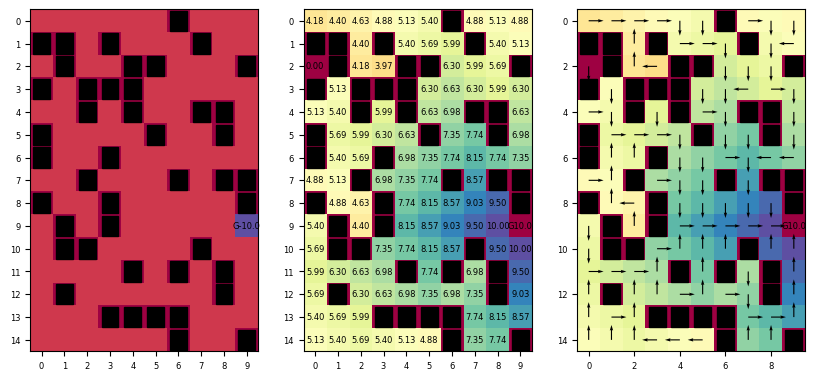

In [2]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 50
goal = [(9,9)]
rewards_list = [10]

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)

# Define the LP problem
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.95, goal=goal)

# Print
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy)

## Linear programming examples <a class="anchor" id="lin-ex"></a>
We studied
* One goal, different $\gamma$
* One goal with ravine
* Multi goals

### One goal, different $\gamma$

In [3]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 50
goal = [(9,9)]
rewards_list = [100]

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list) 

See far in the future: ($\gamma = 0.95$)

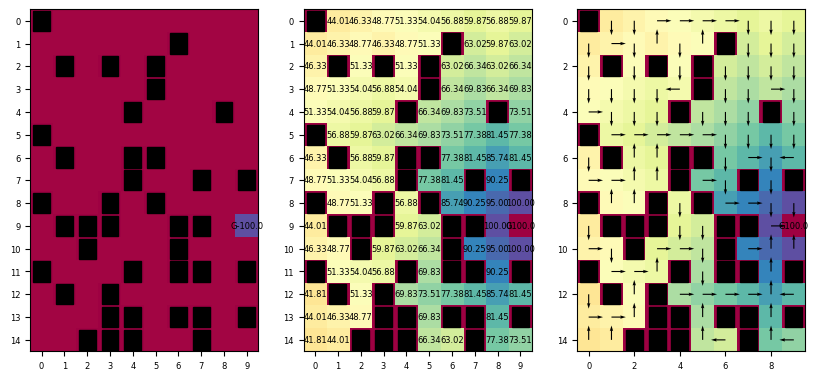

In [4]:
# Solve and print
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.95, goal=goal) # solve
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy) # print

See close in the future: ($\gamma = 0.3$)

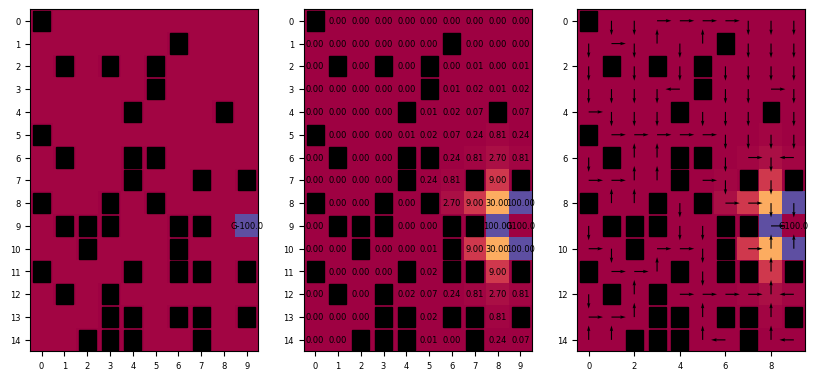

In [5]:
# Solve and print
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.3, goal=goal) # solve
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy) # print

See very very close in the future: ($\gamma = 0.01$)

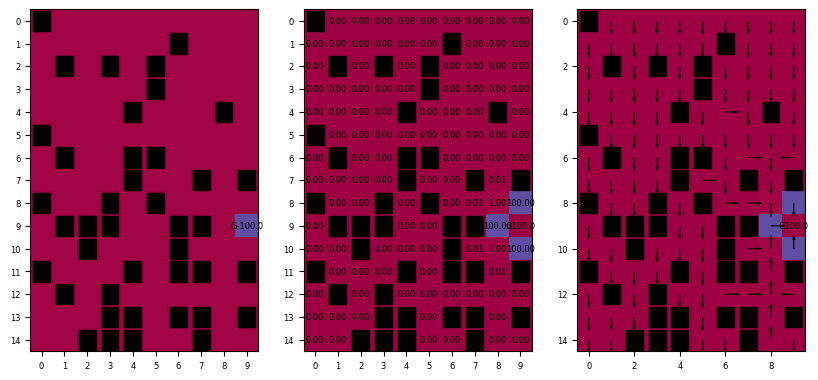

In [6]:
# Solve and print
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.01, goal=goal) # solve
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy) # print

### One goal with ravine 🫣

In [7]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 10
goal = [(5,5),(5,6),(5,7),(9,9)]
rewards_list = [-100,-100,-100,100]

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list) 

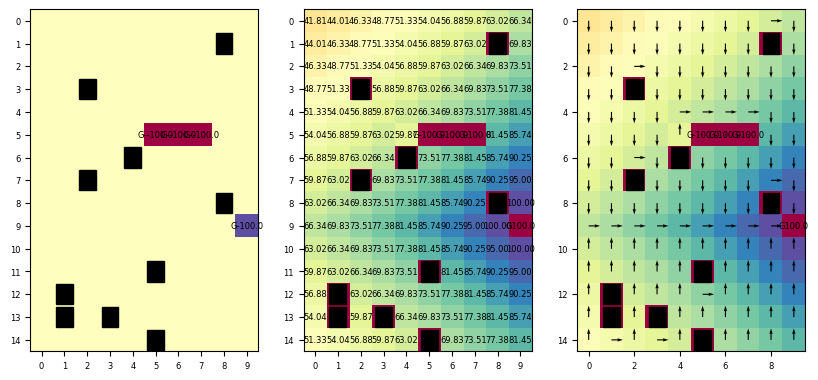

In [8]:
# Solve and print
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.95, goal=goal) # solve
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy) # print

### Multi goals 🍰🍰

In [9]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 10
goal = [(2,3),(5,7),(9,9)]
rewards_list = [20,10,100]

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list) 

See far in the future: $\gamma = 0.95$

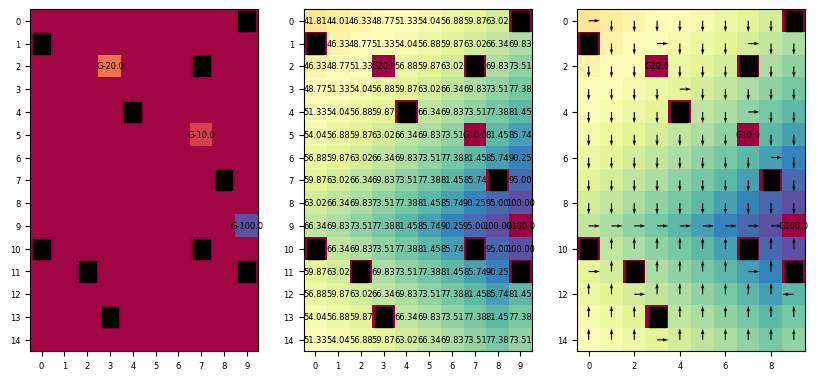

In [10]:
# Solve and print
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.95, goal=goal) # solve
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy) # print

See close in the future: $\gamma = 0.3$

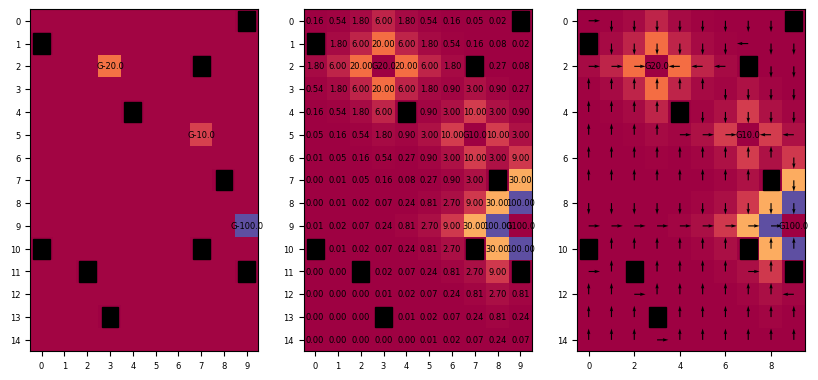

In [11]:
# Solve and print
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=0.3, goal=goal) # solve
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=value_matrix, Policy=NewPolicy) # print

## Times comparison

In [14]:
# Parameters
Lx = 10
Ly = 15
Nblocks = 40
goal = [(9,9)]
rewards_list = [1]
Actions = np.array([[1,0],[-1,0],[0,1],[0,-1]])
max_n_of_iterations = 300
gamma = 0.95
tolerance = 0.001
p = 1
random_flag=False

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

In [17]:
%time value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=gamma, goal=goal)  

%time World, NewValues, Policy, result_info = PY_GW_VI_tools.solve_grid_world(World = World, initial_values = Values, max_n_of_iterations = max_n_of_iterations, gamma = gamma, tolerance = tolerance, possible_actions = Actions, p = p, random_flag=random_flag)

CPU times: total: 125 ms
Wall time: 493 ms
CPU times: total: 219 ms
Wall time: 591 ms


In [20]:
import timeit

# Your code
stmt = "value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=gamma, goal=goal)"

# Measure the execution time
execution_time = timeit.timeit(stmt, setup="from __main__ import PY_GW_LP_tools, World, gamma, goal", number=1)


# Print the execution time
print(f"Execution time: {execution_time} seconds")



Execution time: 0.40803429996594787 seconds
Cpu time: 0.7864146999781951 seconds


In [21]:
import time


# Record the start time
start_time = time.process_time()

# Your code
value_matrix, NewPolicy = PY_GW_LP_tools.solve_GW_with_LP(World=World, gamma=gamma, goal=goal)

# Calculate CPU time
cpu_time = time.process_time() - start_time

# Print the CPU time
print(f"CPU time: {cpu_time} seconds")


CPU time: 0.03125 seconds
